### Data Cleaning

In [1]:
import re
import sqlite3
import pandas as pd
# Step 1: Connect to the SQLite database
conn = sqlite3.connect("imdb_reviews.db")
cursor = conn.cursor()

In [2]:
# Step 2: Fetch all data from the database
print("Fetching all data from the database...")
cursor.execute("SELECT id, review_text, sentiment FROM imdb_reviews;")
data = cursor.fetchall()

Fetching all data from the database...


In [3]:
# Convert data to a pandas DataFrame for easier manipulation
df = pd.DataFrame(data, columns=["id", "review_text", "sentiment"])

# Step 3: Remove duplicates
print("Removing duplicates...")
df.drop_duplicates(subset="review_text", inplace=True)

Removing duplicates...


In [4]:
# Step 4: Clean the text data
def clean_text(text):
    """
    Function to clean text:
    - Convert to lowercase
    - Remove HTML tags
    - Remove punctuation
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    return text

In [5]:
print("Cleaning text data...")
df["cleaned_review"] = df["review_text"].apply(clean_text)

Cleaning text data...


In [6]:
# Step 5: Store the cleaned data
#  Add cleaned data back to the database
print("Updating the database with cleaned data...")
cursor.executemany(
    "UPDATE imdb_reviews SET review_text = ? WHERE id = ?;",
    [(row["cleaned_review"], row["id"]) for _, row in df.iterrows()],
)
conn.commit()

Updating the database with cleaned data...


In [7]:
# Verify the updates 
print("Verifying cleaned data...")
cursor.execute("SELECT id, review_text, sentiment FROM imdb_reviews LIMIT 5;")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Step 6: Close the database connection
conn.close()
print("Data cleaning complete. Connection closed.")

Verifying cleaned data...
(1, 'i rented i am curiousyellow from my video store because of all the controversy that surrounded it when it was first released in 1967 i also heard that at first it was seized by us customs if it ever tried to enter this country therefore being a fan of films considered controversial i really had to see this for myselfthe plot is centered around a young swedish drama student named lena who wants to learn everything she can about life in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states in between asking politicians and ordinary denizens of stockholm about their opinions on politics she has sex with her drama teacher classmates and married menwhat kills me about i am curiousyellow is that 40 years ago this was considered pornographic really the sex and nudity scenes are few and far between even then its n

### EDA

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
# Step 1: Connect to the SQLite database
conn = sqlite3.connect("imdb_reviews.db")
cursor = conn.cursor()

In [10]:
# Step 2: Calculate the number of reviews per sentiment
print("Calculating sentiment distribution...")
sentiment_counts = df["sentiment"].value_counts()
print("\nNumber of reviews per sentiment:")
print(sentiment_counts)

Calculating sentiment distribution...

Number of reviews per sentiment:
sentiment
positive    49766
negative    49394
Name: count, dtype: int64


In [11]:
# Step 3: Calculate the average review length for each sentiment
print("Calculating average review length per sentiment...")
df["review_length"] = df["review_text"].apply(len)
avg_review_length = df.groupby("sentiment")["review_length"].mean()
print("\nAverage review length per sentiment:")
print(avg_review_length)

Calculating average review length per sentiment...

Average review length per sentiment:
sentiment
negative    1261.649512
positive    1294.586284
Name: review_length, dtype: float64


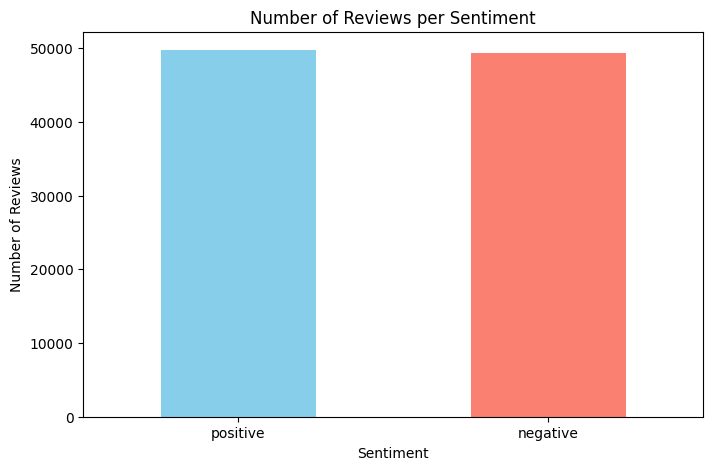

In [12]:
# Step 4: Visualization
# Bar chart for sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Number of Reviews per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [13]:
# Word clouds for positive and negative sentiments
print("Generating word clouds...")
positive_reviews = " ".join(df[df["sentiment"] == "positive"]["review_text"])
negative_reviews = " ".join(df[df["sentiment"] == "negative"]["review_text"])

wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_reviews)


Generating word clouds...


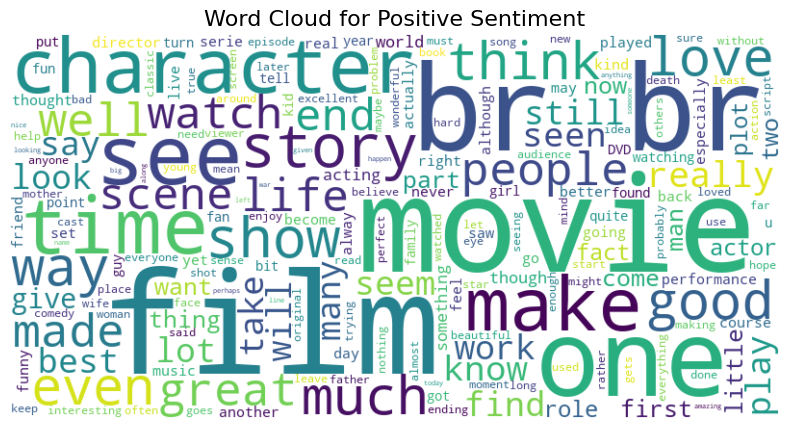

In [14]:
# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

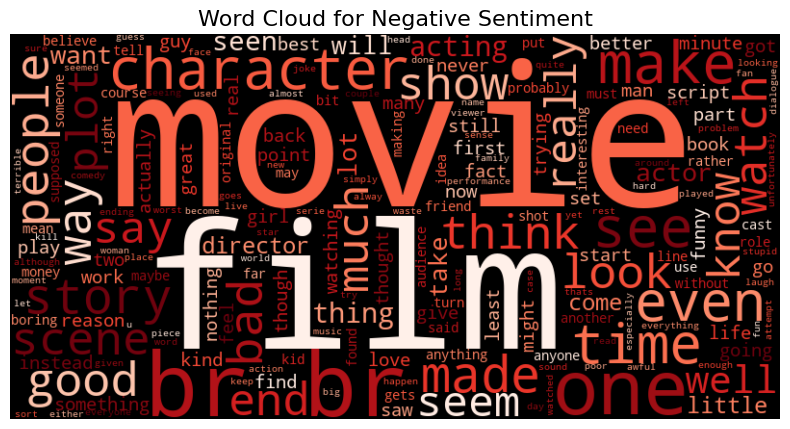

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()